In [55]:
import sklearn.datasets as dts
import sklearn.linear_model as lm 
import pandas as pd
import numpy as np

col1 = 'AGE'
col2 = 'CRIM'
target_name = 'Price'

boston = dts.load_boston()

df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df.insert(0,target_name,boston.target)
df.head(len(boston.feature_names) + 1)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B69992D320>]],
      dtype=object)

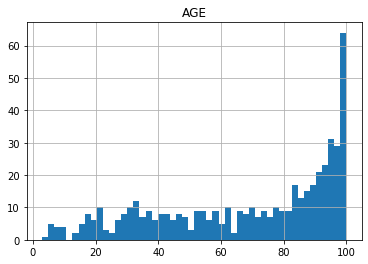

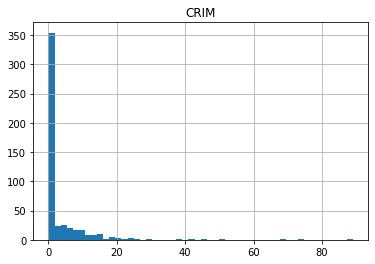

In [56]:
df.hist(column = col1,bins = 50)
df.hist(column = col2, bins = 50)

In [57]:
import matplotlib.pyplot as plt

def get_linear_regression(x,y,c,col_name):
    lin_reg_model = lm.LinearRegression()
    lin_reg_model.fit(x,y)
    y_pred = lin_reg_model.predict(x)

    plt.scatter(x, y,color = c)
    plt.plot(x, y_pred, color='red')
    plt.xlabel(col_name)
    plt.ylabel('Price')
    plt.show()

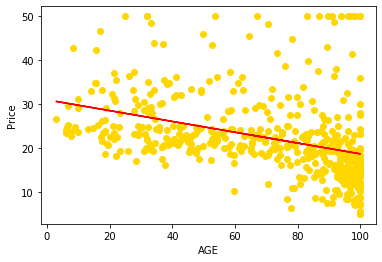

In [62]:
x1 = df[[col1]]
y1 = df[[target_name]]
get_linear_regression(x1,y1,'gold',col1)

The regression above refers to the AGE attribute of boston dataset. As we can see, the linear regression here is negative, and although there are quite a lot of points that don't correspond with our predicted function, I would still consider it a fairly strong one - the majority of scattered values is, in fact, concentrated within the close proximity of our regression. 

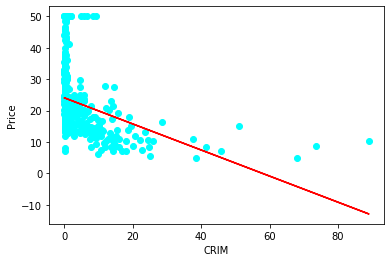

In [64]:
x2 = df[[col2]]
y2 = df[[target_name]]
get_linear_regression(x2,y2,'cyan',col2)

The second regression, prepared with data of crime rate in the neighbourhood of analysed propriety, is definitely far from satisfying - it only starts in appropriate place but fails completely to keep track of scattered data points in the end. I suspect that it is caused by the fact, that from the customer point of view the results are very good (after all, the crime rate rarely reaches value above 0.25, even with less expensive houses, which is good news), thus learning is much harder. 
Since this elementary regression doesn't seem to be enough, I decided to try out a lasso regression, shown below.

In [65]:
from sklearn.model_selection import GridSearchCV

def get_lasso_regression(x,y,c,col_name):
    
    lasso = lm.Lasso(alpha = 15)
    lasso.fit(x,y)
    y_pred = lasso.predict(x)
    
    
    plt.scatter(x, y,color = c)
    plt.plot(x, y_pred, color='red')
    plt.xlabel(col_name)
    plt.ylabel('Price')
    plt.show()

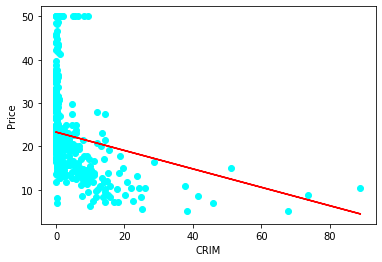

In [66]:
x3 = df[[col2]]
y3 = df[[target_name]]
get_lasso_regression(x3,y2,'cyan',col2)

Here, even though the regression is far from perfect, it is slightly better than before. However, I still would consider it to be weak, in comparison to our results with AGE attribute. 